# Knock Airport Weather

to import weather data from Knock Airport and make plots for:
- the temperature
- the mean temperature each day
- the mean temperature for each month
- the windspeed
- the rolling windspeed over 24 hours
- the max windspeed for each day
- the monthly mean of the daily max windspeed

Author: Joanna Kelly

In [22]:
# importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np

In [23]:
# my data frame:
weather = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows= 23, header= 0)
# the data set doesn't officially start with the headings until line 24

C:\Users\joann\AppData\Local\Temp\ipykernel_17372\2194191420.py:2: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows= 23, header= 0)


In [24]:
# exploring the structure:
weather.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [25]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247674 entries, 0 to 247673
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    247674 non-null  object 
 1   ind     247674 non-null  int64  
 2   rain    247674 non-null  object 
 3   ind.1   247674 non-null  int64  
 4   temp    247674 non-null  float64
 5   ind.2   247674 non-null  int64  
 6   wetb    247674 non-null  float64
 7   dewpt   247674 non-null  float64
 8   vappr   247674 non-null  float64
 9   rhum    247674 non-null  int64  
 10  msl     247674 non-null  object 
 11  ind.3   247674 non-null  int64  
 12  wdsp    247674 non-null  object 
 13  ind.4   247674 non-null  int64  
 14  wddir   247674 non-null  object 
 15  ww      247674 non-null  object 
 16  w       247674 non-null  object 
 17  sun     247674 non-null  float64
 18  vis     247674 non-null  object 
 19  clht    247674 non-null  object 
 20  clamt   247674 non-null  object 
dtypes: float64

In [26]:
# check for missing information
weather.isnull().sum()


date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64

In [27]:
# Parses date column 
weather["date"] = pd.to_datetime(weather["date"], format= "%d-%b-%Y %H:%M", errors="coerce") # I need to specify the format so pandas doesnt rely on dateutil.parser
weather["date"].head() # errors="coerce" converts invalid dates to Na

0   1996-04-10 14:00:00
1   1996-07-31 08:00:00
2   1996-07-31 09:00:00
3   1996-07-31 10:00:00
4   1996-07-31 11:00:00
Name: date, dtype: datetime64[ns]

In [28]:
# Drop missing values
weather= weather.dropna(subset=["date", "temp"])


## Temperature Plots

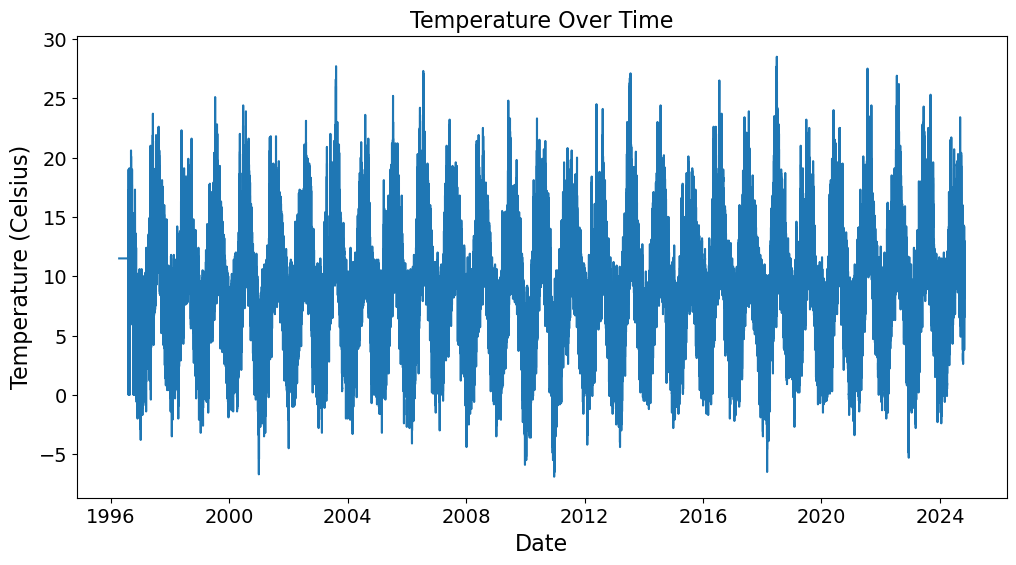

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(x= "date", y= "temp", data= weather)
plt.title("Temperature Over Time", fontsize= 16)
plt.xlabel("Date", fontsize= 16)
plt.ylabel("Temperature (Celsius)", fontsize= 16)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.show()

### The Mean Temperature Each Day

In [30]:
# seperate the dates from date and time to just the date (YYYY-MM-DD)
weather["day"] = weather["date"].dt.date

# group the weather by day, take the average temperature and creates a data frame to plot
daily_mean_temp = weather.groupby("day")["temp"].mean().reset_index()

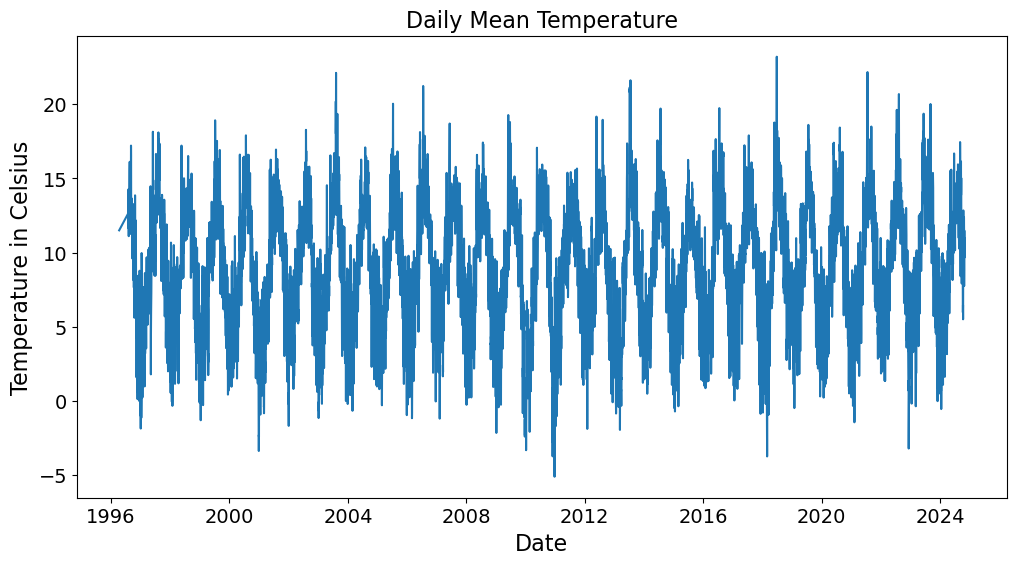

In [31]:
# plots the data
plt.figure(figsize=(12, 6))
sns.lineplot(x= "day", y= "temp", data= daily_mean_temp)
plt.title("Daily Mean Temperature", fontsize= 16)
plt.xlabel("Date", fontsize= 16)
plt.ylabel("Temperature in Celsius", fontsize= 16)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.show()

### The Mean Temperature Each Month

In [32]:
print(weather["date"].dtype) # had issues; needed to ensure dtype is datetime64[ns]

datetime64[ns]


In [33]:
# take the YYYY-MM from the date column
weather["month"] = weather["date"].dt.to_period("M")
monthly_mean_temp = weather.groupby("month")["temp"].mean().reset_index()
monthly_mean_temp["month"] = monthly_mean_temp["month"].dt.to_timestamp()
#monthly_mean_temp["temp"] = monthly_mean_temp["temp"].astype(str)
# converting month to string allowed me to plot the data

In [34]:
# inspect monthly_mean_temp
monthly_mean_temp.dtypes

month    datetime64[ns]
temp            float64
dtype: object

In [35]:
season_colours = {
    
    "Winter": "blue",
    "Spring": "green",
    "Summer": "orange",
    "Autumn": "brown"
}

# categorise months into seasons
monthly_mean_temp["season"] = np.select(
    [
        monthly_mean_temp["month"].dt.month.isin([12, 1, 2]),
        monthly_mean_temp["month"].dt.month.isin([3, 4, 5]),
        monthly_mean_temp["month"].dt.month.isin([6, 7, 8]),
        monthly_mean_temp["month"].dt.month.isin([9, 10, 11])
    ],
    ["Winter", "Spring", "Summer", "Autumn"]
)

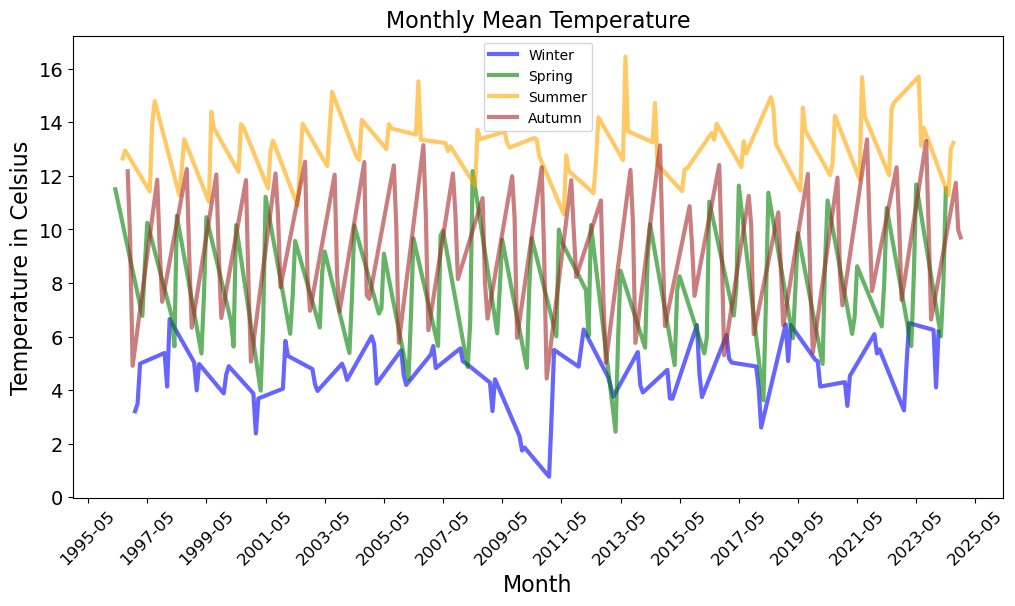

In [36]:
# plots the data
plt.figure(figsize=(12, 6))
for season, color in season_colours.items():
    season_data= monthly_mean_temp[monthly_mean_temp["season"] == season]
    plt.plot(season_data["month"], season_data["temp"], label=season, color=color, linewidth= "3", alpha= 0.6)

plt.title("Monthly Mean Temperature", fontsize= 16)
plt.xlabel("Month", fontsize= 16)
plt.ylabel("Temperature in Celsius", fontsize= 16)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval= 24))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.xticks(fontsize= 12, rotation= 45)
plt.yticks(fontsize= 14)
plt.legend()
plt.show()


## Windspeed Plots

In [37]:
weather["wdsp"].describe()

count     247674
unique        88
top            6
freq       17374
Name: wdsp, dtype: int64

In [46]:
weather["wdsp"]= pd.to_numeric(weather["wdsp"], errors="coerce")
weather["wdsp"].dtypes

dtype('float64')

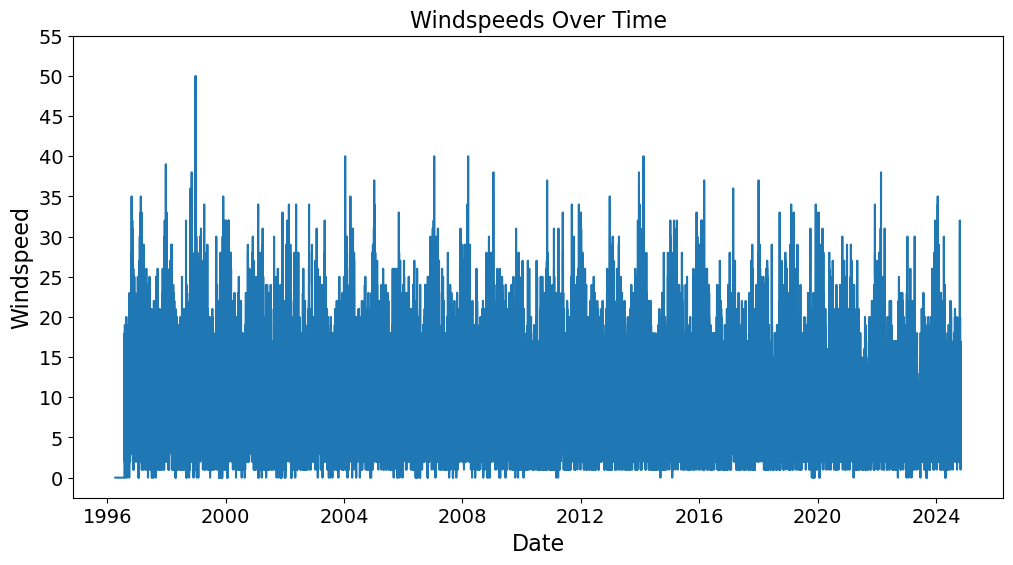

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(weather["date"], weather["wdsp"])
plt.title("Windspeeds Over Time", fontsize= 16)
plt.xlabel("Date", fontsize= 16)
plt.ylabel("Windspeed", fontsize= 16)
plt.xticks(fontsize= 14)
plt.yticks(range(0, 56, 5), fontsize= 14)
plt.show()

### Rolling Windspeed

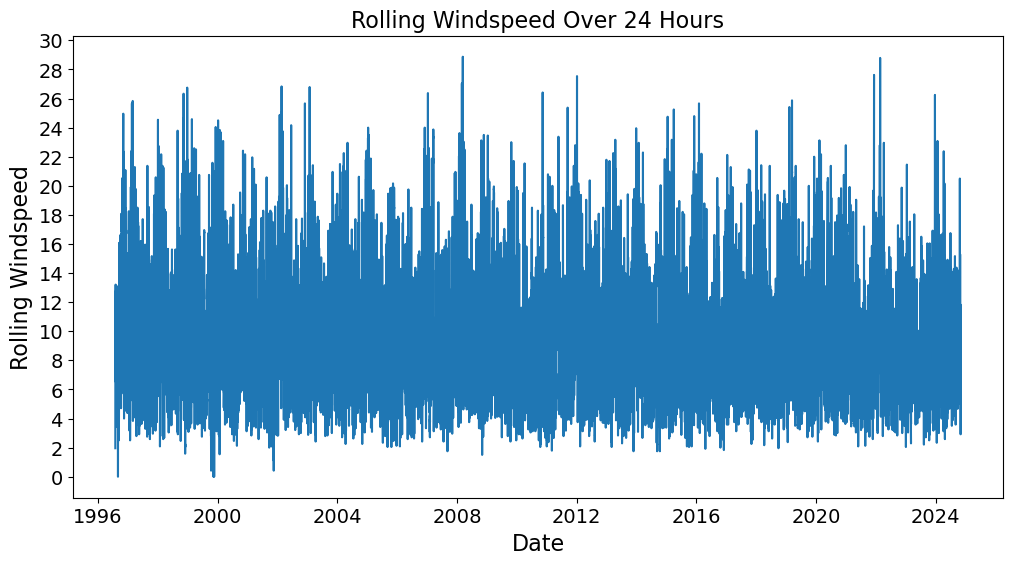

In [58]:
rolling_wdsp= weather["wdsp"].rolling(window= 24).mean()
plt.figure(figsize=(12, 6))
plt.plot(weather["date"], rolling_wdsp)
plt.title("Rolling Windspeed Over 24 Hours", fontsize= 16)
plt.xlabel("Date", fontsize= 16)
plt.ylabel("Rolling Windspeed", fontsize= 16)
plt.xticks(fontsize= 14)
plt.yticks(range(0, 31, 2), fontsize= 14)
plt.show()

## Daily Max Windspeed

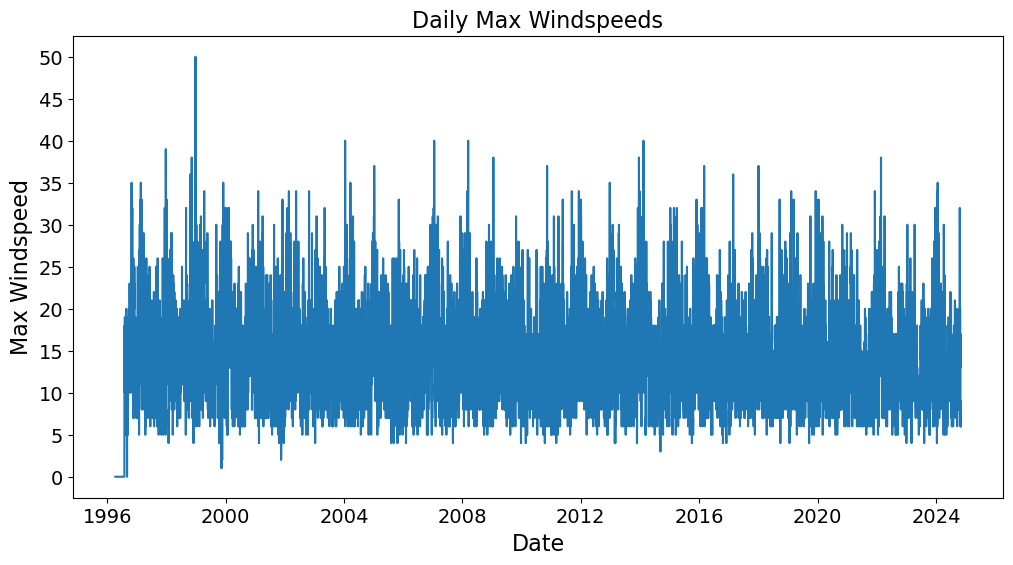

In [62]:
daily_max_wdsp = weather.groupby(weather["date"].dt.date)["wdsp"].max()
plt.figure(figsize=(12, 6))
plt.plot(daily_max_wdsp)
plt.title("Daily Max Windspeeds", fontsize= 16)
plt.xlabel("Date", fontsize= 16)
plt.ylabel("Max Windspeed", fontsize= 16)
plt.xticks(fontsize= 14)
plt.yticks(range(0, 51, 5), fontsize= 14)
plt.show()

## Monthly Mean of Daily Max Windspeeds

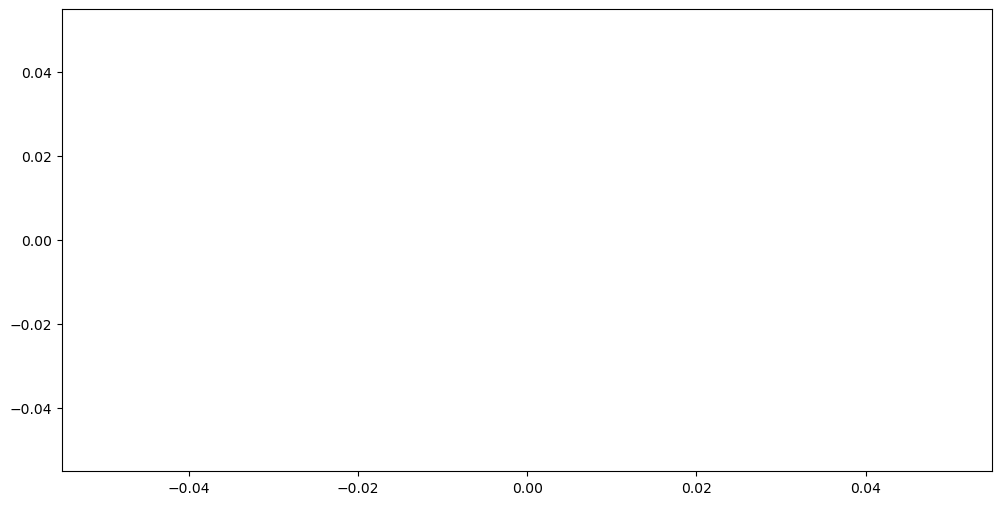

In [ ]:
#stuck
weather["month"] = weather["date"].dt.month
monthly_mean_wdsp= daily_max_wdsp.groupby(weather["mont"].dt.month).mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean_wdsp.index, monthly_mean_wdsp.values, marker="o")
